In [1]:
# mengimport library yang dibutuhkan
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
!pip install wordcloud
!pip3 install PyQt5==5.9.2
!pip install tk
from tkinter import *
from wordcloud import WordCloud, STOPWORDS
import sys
import seaborn as sns
import string
import datetime
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement PyQt5==5.9.2 (from versions: 5.12.3, 5.14.0, 5.14.1, 5.14.2, 5.15.0, 5.15.1, 5.15.2, 5.15.3, 5.15.4, 5.15.5, 5.15.6, 5.15.7)
ERROR: No matching distribution found for PyQt5==5.9.2


Defaulting to user installation because normal site-packages is not writeable


In [2]:
df = pd.read_csv('nyc-rolling-sales.csv.zip', skipinitialspace=True)
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,NaN,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,NaN,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,NaN,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,NaN,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,NaN,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,NaN,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,NaN,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,NaN,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,NaN,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [3]:
df.shape

(84548, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            83810 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   EASE-MENT                       0 non-null      float64
 8   BUILDING CLASS AT PRESENT       83810 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT NUMBER                19052 non-null  object 
 11  ZIP CODE                        84548 non-null  int64  
 12  RESIDENTIAL UNITS               

In [5]:
df.isnull().sum().sort_values(ascending=False)

EASE-MENT                         84548
APARTMENT NUMBER                  65496
TAX CLASS AT PRESENT                738
BUILDING CLASS AT PRESENT           738
Unnamed: 0                            0
COMMERCIAL UNITS                      0
SALE PRICE                            0
BUILDING CLASS AT TIME OF SALE        0
TAX CLASS AT TIME OF SALE             0
YEAR BUILT                            0
GROSS SQUARE FEET                     0
LAND SQUARE FEET                      0
TOTAL UNITS                           0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
BOROUGH                               0
ADDRESS                               0
LOT                                   0
BLOCK                                 0
BUILDING CLASS CATEGORY               0
NEIGHBORHOOD                          0
SALE DATE                             0
dtype: int64

In [6]:
#menghapus kolom yang tidak diperlukan dalam proses analisis statitiska
df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df.drop('EASE-MENT', axis=1, inplace=True)

In [8]:
df.drop(labels=['ADDRESS','APARTMENT NUMBER', 'ZIP CODE'], axis=1, inplace=True)

In [9]:
#'SALE PRICE' diubah ke tipe numerik, missing value akan diubah menjadi NaN
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')

# 'LAND SQUARE FEET' dan 'GROSS SQUARE FEET' diubah ke tipe numerik
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')

# 'SALE DATE' harus bertipe datetime
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

# Kolom-kolom di bawah ini harus categorical
categorical = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT',
         'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categorical:
    df[col] = df[col].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  int64         
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            83810 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       83810 non-null  category      
 7   RESIDENTIAL UNITS               84548 non-null  int64         
 8   COMMERCIAL UNITS                84548 non-null  int64         
 9   TOTAL UNITS                     84548 non-null  int64         
 10  LAND SQUARE FEET                58296 non-null  float64       
 11  GR

In [11]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21


In [12]:
sum(df.duplicated())

959

In [13]:
df = df.drop_duplicates(df.columns, keep='last')

In [14]:
sum(df.duplicated())

0

In [15]:
msg_val = df.isnull().sum()/len(df)*100
print(pd.DataFrame([msg_val[msg_val>0], pd.Series(df.isnull().sum()[df.isnull().sum()>1000])],
                  index=['Persentase missing value', 'Jumlah dari missing value']))

                           TAX CLASS AT PRESENT  BUILDING CLASS AT PRESENT  \
Persentase missing value               0.882891                   0.882891   
Jumlah dari missing value                   NaN                        NaN   

                           LAND SQUARE FEET  GROSS SQUARE FEET    SALE PRICE  
Persentase missing value           31.04954          32.638266     16.837144  
Jumlah dari missing value       25954.00000       27282.000000  14074.000000  


In [16]:
df['SALE PRICE'].describe()

count    6.951500e+04
mean     1.282005e+06
std      1.143784e+07
min      0.000000e+00
25%      2.300000e+05
50%      5.345810e+05
75%      9.500000e+05
max      2.210000e+09
Name: SALE PRICE, dtype: float64

In [17]:
# Menghilangkan semua value yang mengandung null
df = df[df['SALE PRICE'].notnull()]
df = df[df['LAND SQUARE FEET'].notnull()]
df = df[df['GROSS SQUARE FEET'].notnull()]

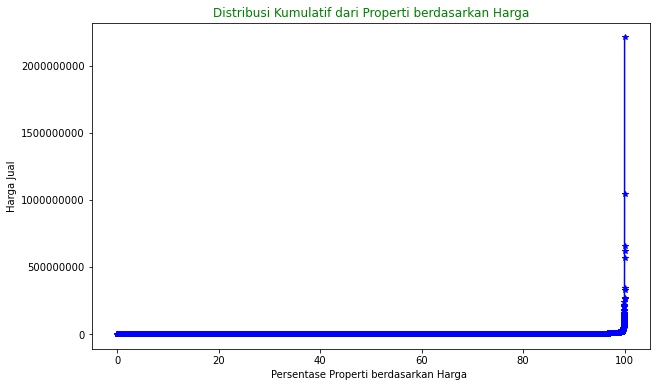

In [18]:
# Mendapatkan proporsi properti data
x= df[['SALE PRICE']].sort_values(by='SALE PRICE').reset_index()
x['PROPERTY PROPORTION']= 1
x['PROPERTY PROPORTION']= x['PROPERTY PROPORTION'].cumsum()
x['PROPERTY PROPORTION'] = 100 * x['PROPERTY PROPORTION']/len(x['PROPERTY PROPORTION'])

plt.figure(figsize=(10,6))

#plot data
plt.plot(x['PROPERTY PROPORTION'], x['SALE PRICE'], linestyle=None, marker='*', color = 'blue')
plt.title("Distribusi Kumulatif dari Properti berdasarkan Harga", color = 'green')
plt.xlabel("Persentase Properti berdasarkan Harga ")
plt.ylabel("Harga Jual")
plt.ticklabel_format(style='plain',axis='y')
plt.show()

Berdasarkan plot di atas terlihat bahwa terdapat banyak outliers. Untuk menghilangkan outliersnya kita bisa mengambil data antara 100.000 USD sampai 5.000.000 USD

In [20]:
df = df[(df['SALE PRICE']>100000) & (df['SALE PRICE']<5000000)]

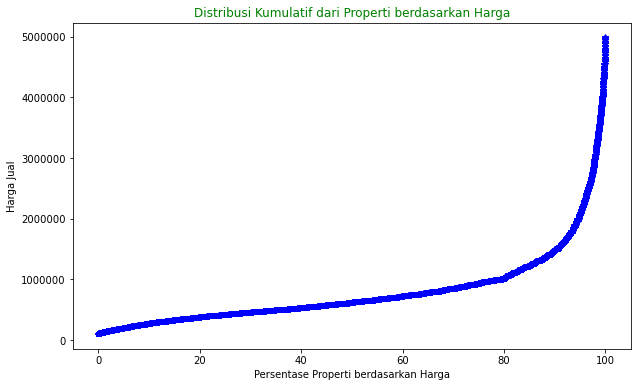

In [21]:
# Lakukan hal yang sama seperti di atas dan lihat perbedaannya
x = df[['SALE PRICE']].sort_values(by='SALE PRICE').reset_index()
x['PROPERTY PROPORTION']= 1
x['PROPERTY PROPORTION']= x['PROPERTY PROPORTION'].cumsum()
x['PROPERTY PROPORTION'] = 100 * x['PROPERTY PROPORTION']/len(x['PROPERTY PROPORTION'])

plt.figure(figsize=(10,6))
plt.plot(x['PROPERTY PROPORTION'], x['SALE PRICE'], linestyle=None, marker='*', color = 'blue')
plt.title("Distribusi Kumulatif dari Properti berdasarkan Harga", color = 'green')
plt.xlabel("Persentase Properti berdasarkan Harga")
plt.ylabel("Harga Jual")
plt.ticklabel_format(style='plain',axis='y')
plt.show()


Berdasarkan plot di atas terlihat bahwa data distribusi sudah tidak ada outliers

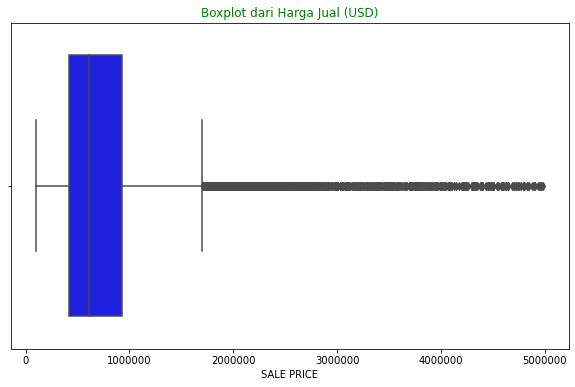

In [22]:
# plot data dengan box plot untuk melihat perbedaan
plt.figure(figsize=(10,6))
sns.boxplot(x='SALE PRICE', data = df, color = 'blue')
plt.ticklabel_format(style='plain', axis='x')
plt.title("Boxplot dari Harga Jual (USD)", color = 'green')
plt.show()

Berdasarkan ploting menggunakan kurva boxplot dapat kita lihat bahwa sudah tidak ada outliers, data sudah lebih baik

## 1. Measure of Central Tendency : Mean

Mean atau Average adalah central tendency dari data, angka diantara seluruh data tersebar atau bisa disebut angka tunggal yang dapat memperkirakan nilai seluruh kumpulan data. Rata-rata dihitung dengan jumlah semua nilai dibagi dengan jumlah nilai.

In [24]:
average = df['SALE PRICE'].mean()

print(average)

795972.4573388677


## 2. Measure of Central Tendency : Median

Median adalah nilai yang membagi data dalam 2 bagian yang sama yaitu jumlah suku di sisi kanannya sama dengan jumlah suku di sisi kirinya saat data disusun dalam urutan naik atau turun. Median merupakan nilai tengah atau titik tengah dalam data dan juga disebut persentil ke-50.

In [25]:
median = df['SALE PRICE'].median()

print(median)

615000.0


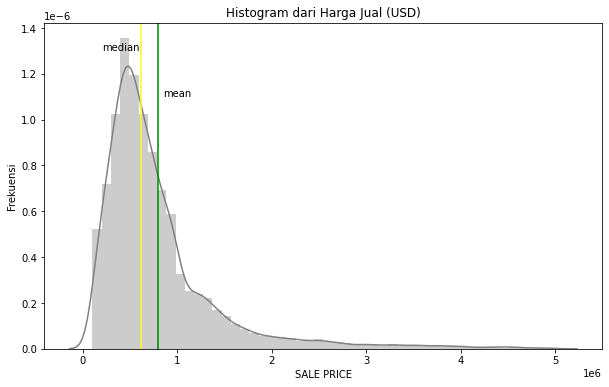

In [26]:
#let's take a look distribution of the data, the data is skewness or normal distribution
plt.figure(figsize=(10,6))
sns.distplot(df['SALE PRICE'], color = 'grey')
plt.title('Histogram dari Harga Jual (USD)')
plt.ylabel("Frekuensi")
plt.axvline(df[(df['SALE PRICE']>100000) & (df['SALE PRICE'] < 5000000)]['SALE PRICE'].mean(), c='green')
plt.text(200000,0.0000013, "median")
plt.axvline(df[(df['SALE PRICE']>100000) & (df['SALE PRICE'] < 5000000)]['SALE PRICE'].median(), c='yellow')
plt.text(850000,0.0000011, "mean")
plt.show()

Dari plot di atas terlihat bahwa sebaran datanya positive skewness karena nilai Mean lebih besar daripada Median

## 3. Measure of Central Tendency : Modus

Modus adalah nilai atau kategori yang paling sering muncul dalam data.

In [27]:
jumlah_bangunan = df['BUILDING CLASS CATEGORY'].value_counts()

jumlah_bangunan

01 ONE FAMILY DWELLINGS                         12354
02 TWO FAMILY DWELLINGS                          9526
10 COOPS - ELEVATOR APARTMENTS                   2649
13 CONDOS - ELEVATOR APARTMENTS                  2634
03 THREE FAMILY DWELLINGS                        2243
07 RENTALS - WALKUP APARTMENTS                   1352
15 CONDOS - 2-10 UNIT RESIDENTIAL                 775
04 TAX CLASS 1 CONDOS                             534
09 COOPS - WALKUP APARTMENTS                      493
12 CONDOS - WALKUP APARTMENTS                     365
22 STORE BUILDINGS                                355
14 RENTALS - 4-10 UNIT                            284
05 TAX CLASS 1 VACANT LAND                        198
29 COMMERCIAL GARAGES                             196
21 OFFICE BUILDINGS                               128
30 WAREHOUSES                                     122
27 FACTORIES                                       69
44 CONDO PARKING                                   63
31 COMMERCIAL VACANT LAND   

Terlihat bahwa BUILDING CLASS CATEGORY yang paling banyak muncul pada dataset ini adalah ONE FAMILY DWELLINGS dengan jumlah total 12354

## 4. Measure of Spread : Range

Range atau Rentang adalah salah satu teknik statistik deskriptif yang paling sederhana. Range adalah perbedaan antara nilai terendah dan tertinggi.

In [28]:
min = jumlah_bangunan.min()

print(min)

0


In [29]:
max = total_bangunan.max()

print(max)

NameError: name 'total_bangunan' is not defined

In [30]:
# Menghitung Range
range = max - min

print(range)

TypeError: unsupported operand type(s) for -: 'builtin_function_or_method' and 'int'

## 5. Measure of Spread : Variance

Variance atau Varians adalah kuadrat jarak rata-rata antara setiap kuantitas dan mean. Variance adalah kuadrat dari Standar Deviasi

In [31]:
variansi = df['SALE PRICE'].var()
variansi

426769738804.34357

## 6. Measure of Spread : Standard Deviation

Standard Deviation atau Simpangan Baku adalah pengukuran jarak rata-rata antara setiap besaran dan mean.

Standar Deviasi yang rendah menunjukkan bahwa titik data cenderung mendekati rata-rata kumpulan data.

Standar Deviasi yang tinggi menunjukkan bahwa titik data tersebar di nilai yang lebih luas.

In [32]:
standar_devisiasi = var_ ** 0.5
standar_devisiasi

NameError: name 'var_' is not defined

In [33]:
standar_devisiasi = df['SALE PRICE'].std()

print(standar_devisiasi)

653276.1581477956


## 7. Probability Distribution

Probability Distribution adalah fungsi di bawah teori dan statistik probabilitas yang memberi seberapa besar kemungkinan hasil yang berbeda dalam sebuah eksperimen. Menggambarkan peristiwa dalam hal probabilitasnya dari semua kemungkinan hasil.

In [34]:
# Menghitung Probability Distribution dari Office Buildings dari Building Class Category
# prob_of = jumlah office building / jumlah seluruh building dari Class Category
prob_of = 128/34692
prob_of

0.003689611437795457

0.14759631798190956


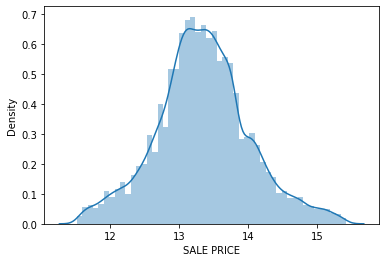

In [35]:
# Distribusi Normal
df['SALE PRICE']=np.log(df['SALE PRICE'])
print(df['SALE PRICE'].skew())
sns.distplot(df['SALE PRICE']);

Dari plot di atas terlihat bahwa data distribusi sudah tidak terdapat skewness yang berarti sebaran data sudah normal

## 8. Convidence Intervals

Confidence Interval (CI) adalah jenis estimasi yang dihitung dari data statistik yang diamati. CI digunakan unuk mengukur seberapa akurat Mean sebuah sample mewakili (mencakup) nilai Mean Populasi sesungguhnya. Jadi, Confidence Interval adalah rentang antara dua nilai dimana nilai suatu Sample Mean tepat berada di tengah-tengahnya.

In [36]:
# Menghitung CI dari Office Buildings dari Building Class Category
Office = df[df['BUILDING CLASS CATEGORY'] =='OFFICE BUILDINGS']

In [37]:
n = 34692

In [38]:
prob_of = 128/n
prob_of

0.003689611437795457

In [39]:
se_of = np.sqrt(prob_of * (1-prob_of) / n)
se_of

0.0003255164769176591

In [40]:
z_score = 1.96

lcb = prob_of - z_score * se_of #lower limit dari CI
ucb = prob_of + z_score * se_of #upper limit dari CI

lcb,ucb

(0.0030515991430368453, 0.004327623732554069)

atau

In [41]:
sm.stats.proportion_confint(n * prob_of, n)

(0.0030516108666624815, 0.004327612008928433)

Jadi, Convidence Interval adalah 0.0030516108666624815 dan 0.004327612008928433

## 9. Hypothesis Testing

Hipotesis adalah anggapan dasar atau jawaban sementara terhadap masalah yang masih bersifat praduga karena masih harus dibuktikan kebenarannya. Hipotesis harus dapat diuji, baik dengan eksperimen atau observasi.

Hypothesis Testing dalam statistik adalah cara menguji hasil survey atau eksperimen untuk melihat apakah memiliki hasil yang bermakna. Pada dasarnya menguji apakah hasil valid dengan mencari tahu kemungkinan bahwa hasil terjadi secara kebetulan.

In [42]:
df['BOROUGH'] = df['BOROUGH'].astype(str)
df['BOROUGH'] = df['BOROUGH'].str.replace("1", "Manhattan")
df['BOROUGH'] = df['BOROUGH'].str.replace("2", "Bronx")
df['BOROUGH'] = df['BOROUGH'].str.replace("3", "Brooklyn")
df['BOROUGH'] = df['BOROUGH'].str.replace("4", "Queens")
df['BOROUGH'] = df['BOROUGH'].str.replace("5", "Staten Island")

In [43]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10,0,10,2272.0,6794.0,1913,2,C4,15.185745,2016-09-23
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,8,0,8,1750.0,4226.0,1920,2,C4,14.976421,2016-09-23
172,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,391,19,S3,3,1,4,1520.0,3360.0,1910,2,S3,15.009433,2016-11-15
174,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,394,5,S5,5,1,6,1779.0,3713.0,1910,2,S5,15.373655,2017-04-03
195,Manhattan,ALPHABET CITY,22 STORE BUILDINGS,4,390,34,K4,0,1,1,1218.0,3586.0,1899,4,K4,15.123843,2016-09-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84540,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,93,B2,2,0,2,3325.0,1300.0,1995,1,B2,13.140203,2016-10-31
84541,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,126,B2,2,0,2,11088.0,2160.0,1994,1,B2,13.381646,2016-12-07
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,2,0,2,2400.0,2575.0,1998,1,B9,13.017003,2016-11-28
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,2,0,2,2498.0,2377.0,1998,1,B9,13.217674,2017-04-21


In [44]:
df_borough = df.groupby('BOROUGH', axis=0).sum()

df_borough

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
BOROUGH,,,,,,,,,
Bronx,19585559,1370003,8550,398,8947,10882624.0,9701223.0,8216376,58809.674241
Brooklyn,61616042,5466898,22069,1182,23341,22044154.0,21859405.0,25773358,196625.898233
Manhattan,506732,17482,2384,242,2625,861416.0,4033676.0,589305,4456.865101
Queens,84318984,568145,20304,3141,23437,39427791.0,25687267.0,20311476,139840.960343
Staten Island,16335608,397679,6442,464,6900,24941536.0,10624523.0,9509788,63271.693318


Dengan melihat data diatas, apakah harga rata rata per unit pada borough Brooklyn lebih besar secara signifikan daripada Manhattan?

h0 = Tidak ada perbedaan secara signifikan pada harga rata rata perunit antara borough Brooklyn dan Manhattan

h1 = Terdapat perbedaan secara signifikan pada harga rata rata per unit antara borugh Brooklyn dan Manhattan

In [45]:
Brooklyn = df[df['BOROUGH']=='Brooklyn']
Manhattan = df[df['BOROUGH']=='Manhattan']

In [46]:
total_unit_Brooklyn = df_borough.iloc[-2, 4]
mu_Brooklyn = Brooklyn['SALE PRICE'].mean()
std_Brooklyn = Brooklyn['SALE PRICE'].std()
total_unit_Brooklyn, mu_Brooklyn, std_Brooklyn

(23437, 13.548260058807184, 0.7236732882735784)

In [47]:
total_unit_Manhattan = df_borough.iloc[-1, 4]
mu_Manhattan = Manhattan['SALE PRICE'].mean()
std_Manhattan = Manhattan['SALE PRICE'].std()
total_unit_Manhattan, mu_Manhattan, std_Manhattan

(6900, 14.470341238136486, 0.743477551576598)

In [48]:
from statsmodels.stats.weightstats import ztest
ztest, pval= ztest(Brooklyn['SALE PRICE'],Manhattan['SALE PRICE'])
print("pval: ",float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

pval:  2.253238313681692e-108
reject null hypothesis


Kesimpulan

Dengan hasil ini dapat ditarik kesimpulan bahwa terdapat perbedaan yang cukup signifikan pada harga rata-rata per unit antara Borough Brooklyn dengan Manhattan

## Overall Analysis

Berdasarkan analisis di atas dapat diambil beberapa kesimpulan antara lain :

Dataset NYC Rolling Sale masih terdapat banyak missing value sehingga perlu dilakukan pre-processing data dengan data cleaning. Dilihat dari boxplot SALE PRICE di masing-masing wilayah NYC masih terdapat banyak outliers sehingga harus difilter terlebih dahulu. Berdasarkan probability distribution dari SALE PRICE pada masing-masing wilayah di NYC, semua wilayah memiliki distribusi yang besar namun hanya wilayah Bronx yang berdistribusi normal. Berdasarkan hypothesis testing didapat perbedaan yang cukup signifikan pada harga rata-rata per unit antara Borough Brooklyn dengan Manhattan